## Little training monitor

Tails a `lighting_logs/version_X` directory for train/val loss.

In [1]:
# %pip install datasets transformers zstandard matplotlib
import torch
import text_data
import conv_text
import numpy as np
import pandas as pd


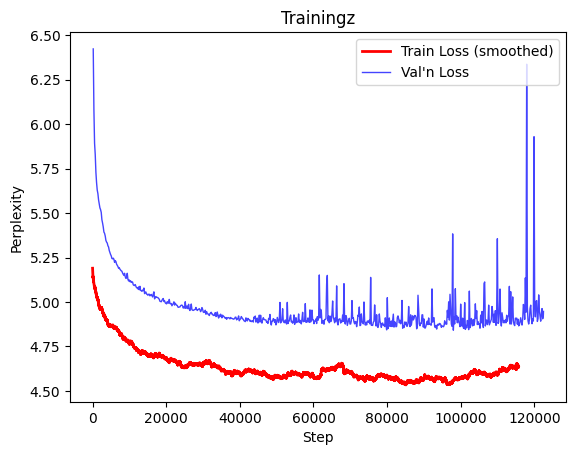

In [2]:
tdat = pd.read_csv('lightning_logs/version_1/metrics.csv')
train = tdat.train_loss[~np.isnan(tdat.train_loss)]

xspace = np.linspace(0, len(train), len(train))
fsz = max(20, len(train)//20)
filter = np.ones(fsz)/fsz
# filter =  np.linspace(0.25, 1.75, num=fsz)/fsz

import matplotlib.pyplot as plt

# plt.plot( train, label = 'Train Loss', color='#fdd', linewidth=1)
plt.plot( np.convolve(train, filter, mode='valid'), label = 'Train Loss (smoothed)', color='r', linewidth=2)
if 'val_loss' in tdat.columns:
    val = tdat.val_loss[~np.isnan(tdat.val_loss)]
    plt.plot( val, label = 'Val\'n Loss', color='#44f', linewidth=1)

plt.xlabel('Step')
plt.ylabel('Perplexity')
plt.legend(loc='upper right')
plt.title('Trainingz')
plt.show()


In [3]:
np.mean(tdat.train_loss[-100:])


4.880728827616603

In [4]:
tdat.val_loss[~np.isnan(tdat.val_loss)]

180       6.423004
361       6.082375
542       5.892303
723       5.829062
904       5.729416
            ...   
121902    4.933624
122083    4.962998
122264    4.905374
122445    4.926135
122477    4.947013
Name: val_loss, Length: 677, dtype: float64

In [5]:
tdat[-100:]

,train_loss,length,epoch,step,val_loss,test_loss
122379,5.103460,61.000000,6,12170499,NaN,NaN
122380,5.606905,6.000000,6,12170599,NaN,NaN
122381,0.300085,8.000000,6,12170699,NaN,NaN
122382,5.997995,167.000000,6,12170799,NaN,NaN
122383,5.112641,61.000000,6,12170899,NaN,NaN
...,...,...,...,...,...,...
122474,4.130562,180.000000,6,12179899,NaN,NaN
122475,5.308599,220.000000,6,12179999,NaN,NaN
122476,7.072628,97.000000,6,12180005,NaN,NaN
122477,NaN,118.186287,6,12180005,4.947013,NaN
